In [1]:
from utilities import transform_data

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score, homogeneity_score, completeness_score, v_measure_score, silhouette_score

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [2]:
train_df = pd.read_csv('data_lab2/train.csv', sep=',', header=0,
                        index_col=False)
lab2_cat = ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']
lab2_num = ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch',
            'Fare']

train_df = transform_data(train_df, lab2_num, lab2_cat, 2)

In [3]:
all_cols = train_df.columns[1:]
x = train_df[all_cols]
y = train_df['Survived']

In [4]:
def pca_drawer(x_train, y_train, centers=None):
    pca = PCA(2)
    data = pca.fit_transform(x_train)
    plt.figure(figsize=(7,7))
    plt.scatter(data[:, 0], data[:, 1], c=y_train)
    if centers is not None:
        centers = pca.transform(centers)
        plt.scatter(centers[:, 0], centers[:, 1],
                   c=np.arange(centers.shape[0]), marker="+", s=600)
    plt.show()

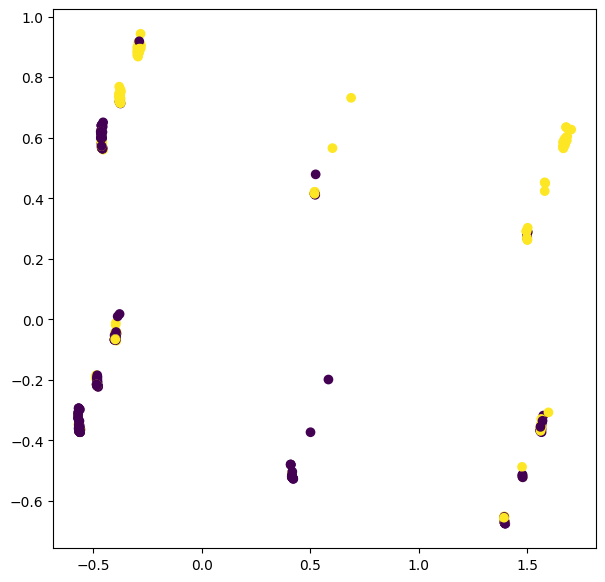

In [5]:
pca_drawer(x, y)

In [6]:
def elbow(x, y):
    plt.figure(figsize=(5,5))
    plt.plot(x, y, "gx-")
    plt.xlabel("K")
    plt.ylabel("Score")
    plt.title("Метод локтя")
    plt.show()

In [7]:
def scorer(x, y, y_pred):
    return pd.DataFrame({
        'Adjusted Rand index': [adjusted_rand_score(y, y_pred)],
        'Adjusted Mutual Information': [adjusted_mutual_info_score(y, y_pred)],
        'Homogeneity': [homogeneity_score(y, y_pred)],
        'completeness': [completeness_score(y, y_pred)],
        'V-measure': [v_measure_score(y, y_pred)],
        'Silhouette_score': [silhouette_score(x, y_pred)],
    })

In [8]:
km = KMeans(n_clusters=2,
            random_state=0
           ).fit(x)
y_pred = km.labels_

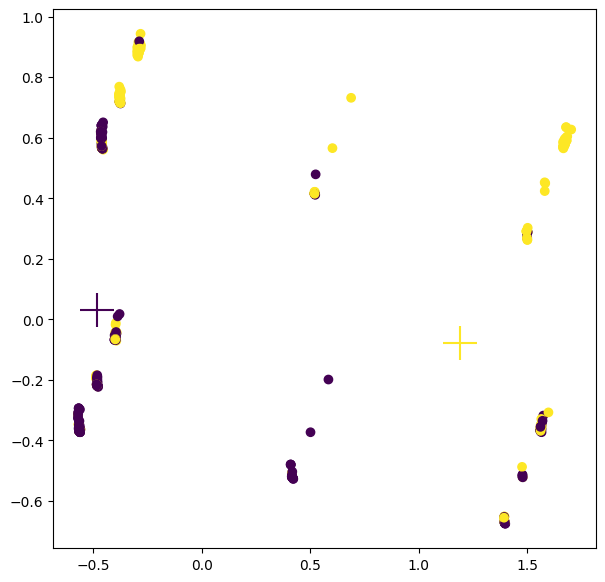

,Adjusted Rand index,Adjusted Mutual Information,Homogeneity,completeness,V-measure,Silhouette_score
0,0.055494,0.024846,0.024941,0.027791,0.026289,0.512137


In [9]:
pca_drawer(x, y, km.cluster_centers_)
scorer(x, y, y_pred)

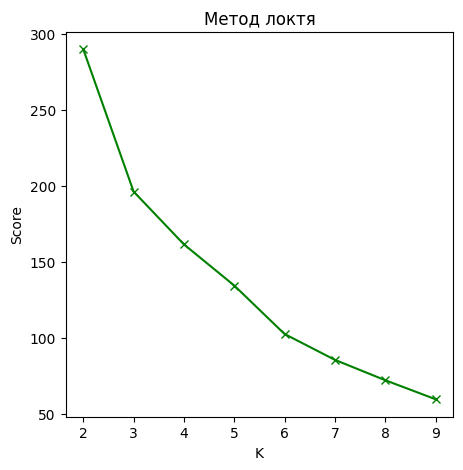

In [10]:
squares = []
for k in range(2, 10):
    km = KMeans(n_clusters=k).fit(x)
    squares.append(km.inertia_)

elbow(range(2, 10), squares)

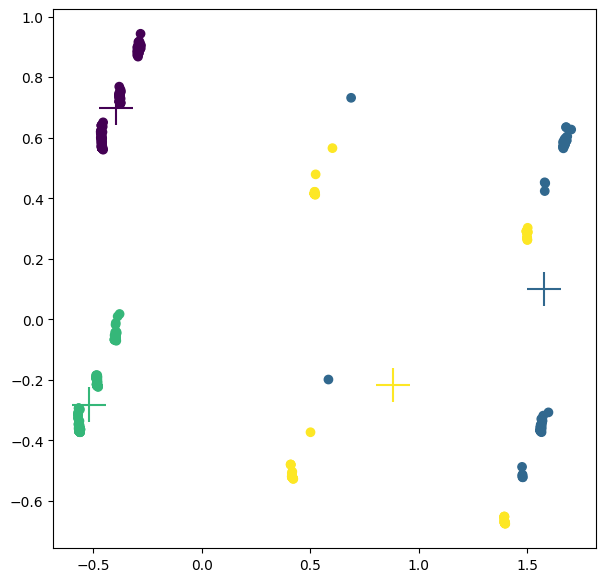

,Adjusted Rand index,Adjusted Mutual Information,Homogeneity,completeness,V-measure,Silhouette_score
0,0.172355,0.109253,0.1599,0.086048,0.111886,0.468628


In [11]:
km = KMeans(
    n_clusters=4
).fit(x)
y_pred = km.labels_
pca_drawer(x, y_pred, km.cluster_centers_)
scorer(x, y, y_pred)